# Video Games Sales with Ratings Analysis

For this project I will be analyzing some Video Games Sales data from [Kaggle](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). The data contains the following fields:

* Name
* Platform
* Year_of_Release
* Genre, Publisher
* NA_Sales (in millions)
* EU_Sales (in millions)
* JP_Sales (in millions)
* Other_Sales (in millions)
* Global_Sales (in millions)
* Critic_score - Aggregate score compiled by Metacritic staff
* Critic_count - The number of critics used in coming up with the Critic_score
* User_score - Score by Metacritic's subscribers
* User_count - Number of users who gave the user_score
* Developer - Party responsible for creating the game
* Rating - The ESRB ratings

Let's start the analysis and find out more about the video games world! For this I will be using the following languages or libararies: 

* Python 
* Numpy
* Pandas
* Matplotlib
* Seaborn


## Data and Setup

____
** Import numpy and pandas **

In [46]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [48]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


** Read in the csv file as a dataframe called df **

In [49]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [50]:
pd.reset_option('^display.', silent=True)

** Check the info() of the df **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


** What the timeframe we are talking about? **

In [7]:
df['Year_of_Release'].min()


1980.0

In [8]:
df['Year_of_Release'].max()

2020.0

In [9]:
df[df['Year_of_Release']==2020]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E


In [10]:
df.drop(labels=5936, axis=0, inplace=True)


In [11]:
df['Year_of_Release'].max()

2017.0

In [12]:

df['Year_of_Release']=df['Year_of_Release'].round()
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Basic Questions

** What are the top 5 publishers of video games in Volume? **

In [13]:
df['Publisher'].value_counts().head(5)

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          932
Konami Digital Entertainment     834
Name: Publisher, dtype: int64

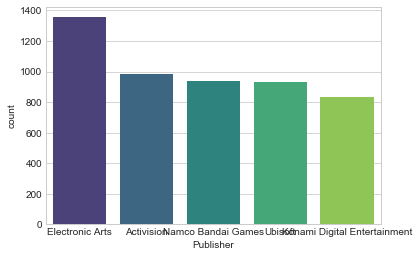

In [14]:
sns.countplot(x='Publisher',data=df, palette='viridis', order=pd.value_counts(df['Publisher']).iloc[:5].index)

** What are the top 5 platform of video games in Volume? **

In [15]:
df['Platform'].value_counts().head(5)

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
Name: Platform, dtype: int64

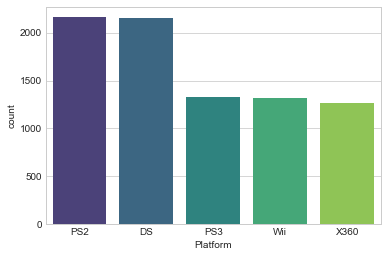

In [16]:
sns.countplot(x='Platform',data=df, palette='viridis', order=pd.value_counts(df['Platform']).iloc[:5].index)

** What are the top 5 Games in terms of Sales? **

In [17]:
sd = df[['Name','Global_Sales']].head(5)
sd

,Name,Global_Sales
0,Wii Sports,82.53
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
4,Pokemon Red/Pokemon Blue,31.37


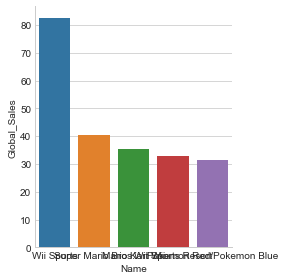

In [18]:

sns.factorplot(x = 'Name', y = 'Global_Sales', kind ='bar', data = sd)

In [19]:
df[['Name','Platform','Publisher','Global_Sales']].head(5)

,Name,Platform,Publisher,Global_Sales
0,Wii Sports,Wii,Nintendo,82.53
1,Super Mario Bros.,NES,Nintendo,40.24
2,Mario Kart Wii,Wii,Nintendo,35.52
3,Wii Sports Resort,Wii,Nintendo,32.77
4,Pokemon Red/Pokemon Blue,GB,Nintendo,31.37


It's interesting to see that result in volume and values varies a lot.  Top publishers in games in volume are not the one selling the most. As you can see with this last table Nintendo is the TOP publisers in terms of sales.

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

In [20]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


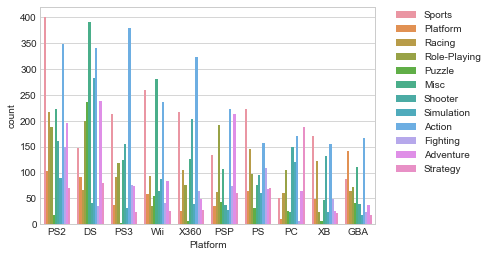

In [21]:
sns.countplot(x='Platform',data=df,hue='Genre', order=pd.value_counts(df['Platform']).iloc[:10].index)

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [22]:
df[df['Publisher'] == '10TACLE Studios']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
12380,Panzer Tactics,DS,2007.0,Strategy,10TACLE Studios,0.06,0.00,0.0,0.0,0.06,NaN,NaN,NaN,NaN,NaN,NaN
14665,Boulder Dash: Rocks!,DS,2007.0,Puzzle,10TACLE Studios,0.00,0.03,0.0,0.0,0.03,NaN,NaN,NaN,NaN,NaN,NaN
15807,Pirates: Legend of the Black Buccaneer,PS2,2006.0,Adventure,10TACLE Studios,0.01,0.01,0.0,0.0,0.02,42.0,4.0,7,5.0,WideScreen Games,T


**How many games each publishers launched?**

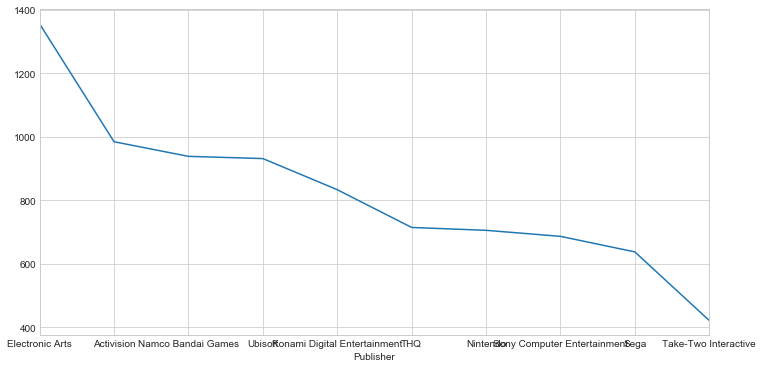

In [23]:
plt.figure(figsize=(12,6))
byPublishers = df.groupby('Publisher').count()
byPublishers['Name'].nlargest(10).plot()

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [24]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
byyear = df.groupby('Year_of_Release').sum()

byyear.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,,,,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38,NaN,NaN,NaN
1981.0,33.40,1.96,0.00,0.32,35.77,NaN,NaN,NaN
1982.0,26.92,1.65,0.00,0.31,28.86,NaN,NaN,NaN
1983.0,7.76,0.80,8.10,0.14,16.79,NaN,NaN,NaN
1984.0,33.28,2.10,14.27,0.70,50.36,NaN,NaN,NaN


** Let's see how the sales in volume over time **

In [26]:

df2 = df.melt(id_vars=['Year_of_Release'],value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'])
df2
df2byyear = df2.groupby(['Year_of_Release','variable']).sum()

df2byyear = df2byyear.reset_index()
df2byyear.head()

,Year_of_Release,variable,value
0,1980.0,EU_Sales,0.67
1,1980.0,Global_Sales,11.38
2,1980.0,JP_Sales,0.00
3,1980.0,NA_Sales,10.59
4,1980.0,Other_Sales,0.12


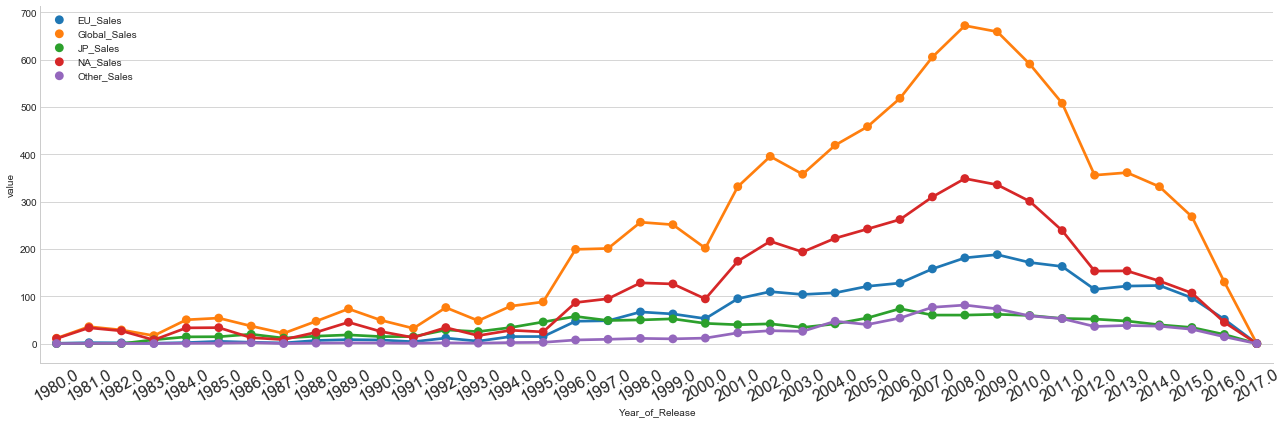

In [27]:

sns.factorplot(x="Year_of_Release", y="value", hue='variable', data = df2byyear, size= 6, aspect= 3, legend=0).set_xticklabels(rotation=30, size= 16)
plt.legend(loc='upper left')

plt.tight_layout()

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

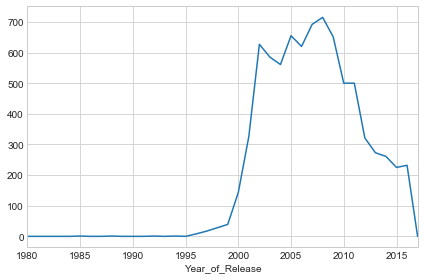

In [28]:
df.groupby('Year_of_Release').count()['Critic_Score'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [29]:
top10sellers = []
topten = df.groupby(['Publisher']).count().reset_index().sort_values('Global_Sales', ascending=False).head(10)
for x in topten['Publisher']:
    top10sellers.append(x)
print(top10sellers)
    

['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment', 'THQ', 'Nintendo', 'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive']


In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#this doesn't work !!!!
df3 = df[['Year_of_Release','Publisher','Critic_Score','Critic_Count']]
groupeddf3= df3.groupby(['Year_of_Release','Publisher']).mean().reset_index()
sns.pointplot(x='Year_of_Release', y='Critic_Score', data = groupeddf3, hue = 'Publisher')

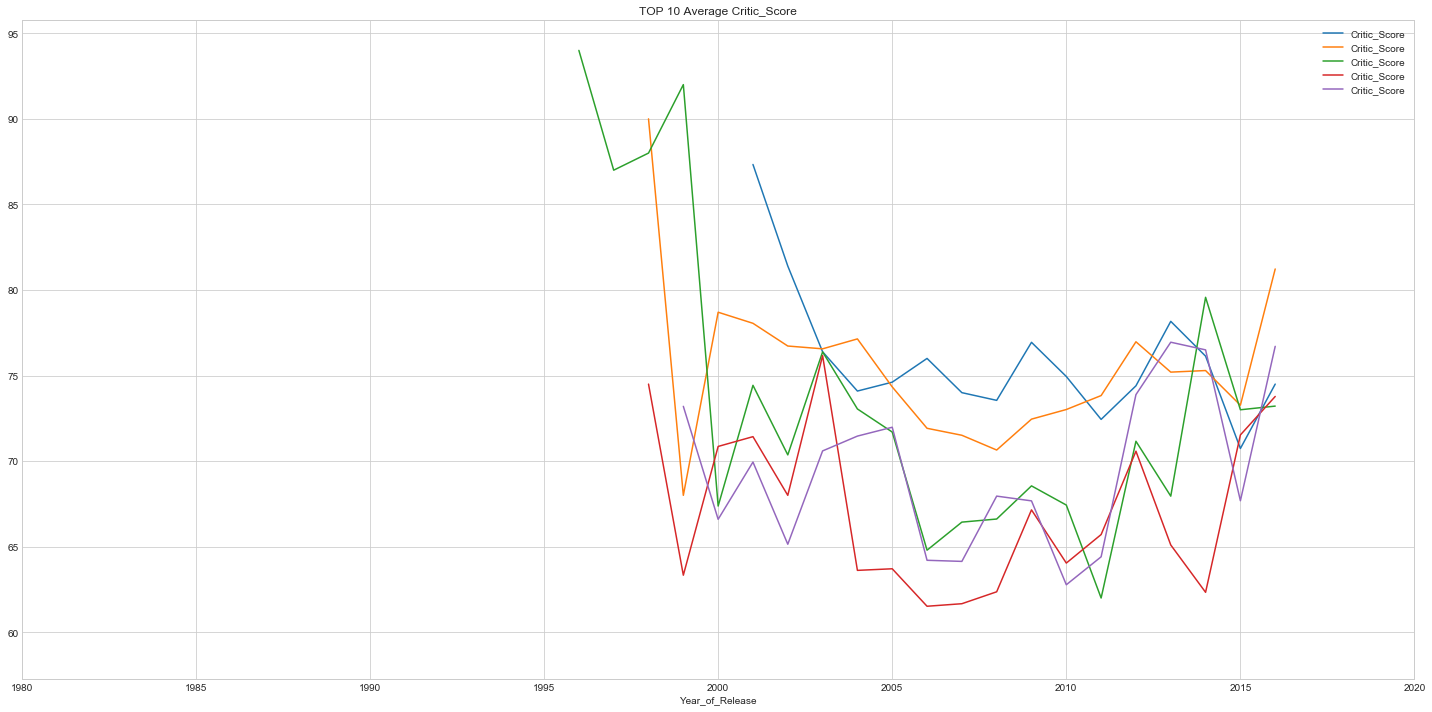

In [7]:
fig = plt.figure(figsize= (20,10))
df[df['Publisher']=='Nintendo'].groupby('Year_of_Release').mean()['Critic_Score'].plot()
df[df['Publisher']=='Electronic Arts'].groupby('Year_of_Release').mean()['Critic_Score'].plot()
df[df['Publisher']=='Activision'].groupby('Year_of_Release').mean()['Critic_Score'].plot()
df[df['Publisher']=='Namco Bandai Games'].groupby('Year_of_Release').mean()['Critic_Score'].plot()
df[df['Publisher']=='Ubisoft'].groupby('Year_of_Release').mean()['Critic_Score'].plot()

plt.title('TOP 10 Average Critic_Score')
plt.tight_layout()
plt.legend()



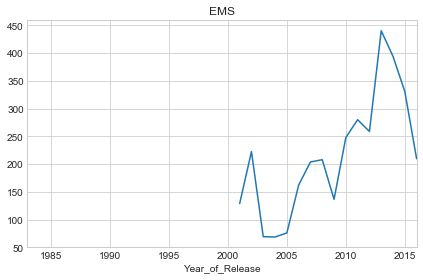

In [42]:
df[df['Publisher']=='Nintendo'].groupby('Year_of_Release').mean()['User_Count'].plot()
plt.title('EMS')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [35]:
dfcopie = df
dfcopie.head()
df['Bins'] = pd.cut(dfcopie['Global_Sales'], bins=10)
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Bins
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,"(74.278, 82.53]"
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,"(33.018, 41.27]"
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,"(33.018, 41.27]"
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,"(24.766, 33.018]"
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,"(24.766, 33.018]"


In [36]:
genresales = df.groupby(by=['Bins','Genre']).mean()['Critic_Score'].unstack()
genresales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Bins,,,,,,,,,,,,
"(-0.0725, 8.262]",66.501063,65.331269,69.159314,66.594175,67.853659,67.381166,67.730245,72.594558,69.904198,68.514286,71.936081,72.086093
"(8.262, 16.514]",97.000000,NaN,93.000000,70.000000,88.333333,77.000000,90.333333,94.000000,87.333333,87.000000,82.000000,NaN
"(16.514, 24.766]",96.000000,NaN,NaN,69.000000,NaN,NaN,91.000000,NaN,NaN,NaN,80.000000,NaN
"(24.766, 33.018]",NaN,NaN,NaN,58.000000,88.000000,NaN,NaN,NaN,NaN,NaN,80.000000,NaN
"(33.018, 41.27]",NaN,NaN,NaN,NaN,NaN,NaN,82.000000,NaN,NaN,NaN,NaN,NaN
"(41.27, 49.522]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(49.522, 57.774]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(57.774, 66.026]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(66.026, 74.278]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df.pivot_table(values = 'Critic_Score', index = ['Bins'], columns = ['Genre'])

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Bins,,,,,,,,,,,,
"(-0.0725, 8.262]",66.501063,65.331269,69.159314,66.594175,67.853659,67.381166,67.730245,72.594558,69.904198,68.514286,71.936081,72.086093
"(8.262, 16.514]",97.000000,NaN,93.000000,70.000000,88.333333,77.000000,90.333333,94.000000,87.333333,87.000000,82.000000,NaN
"(16.514, 24.766]",96.000000,NaN,NaN,69.000000,NaN,NaN,91.000000,NaN,NaN,NaN,80.000000,NaN
"(24.766, 33.018]",NaN,NaN,NaN,58.000000,88.000000,NaN,NaN,NaN,NaN,NaN,80.000000,NaN
"(33.018, 41.27]",NaN,NaN,NaN,NaN,NaN,NaN,82.000000,NaN,NaN,NaN,NaN,NaN
"(41.27, 49.522]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(49.522, 57.774]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(57.774, 66.026]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(66.026, 74.278]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


** Now create a HeatMap using this new DataFrame. **

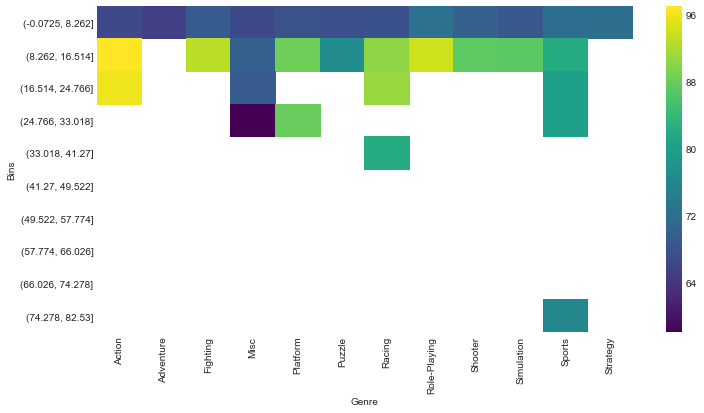

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(genresales,cmap='viridis')

In [13]:

df4 = df.groupby('Publisher').sum().sort_values(by = 'Global_Sales', ascending=False).head(20).reset_index()
df4.head()

,Publisher,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
0,Nintendo,1402730.0,816.97,419.01,458.15,94.68,1788.81,23413.0,13029.0,58157.0
1,Electronic Arts,2696650.0,599.50,373.91,14.35,128.96,1116.96,76636.0,28218.0,169765.0
2,Activision,1959140.0,432.59,215.90,6.71,75.81,731.16,39641.0,15380.0,121404.0
3,Sony Computer Entertainment,1375104.0,266.17,186.56,74.15,79.67,606.48,25827.0,12980.0,88341.0
4,Ubisoft,1867400.0,252.74,161.99,7.52,49.18,471.61,38231.0,14109.0,85994.0


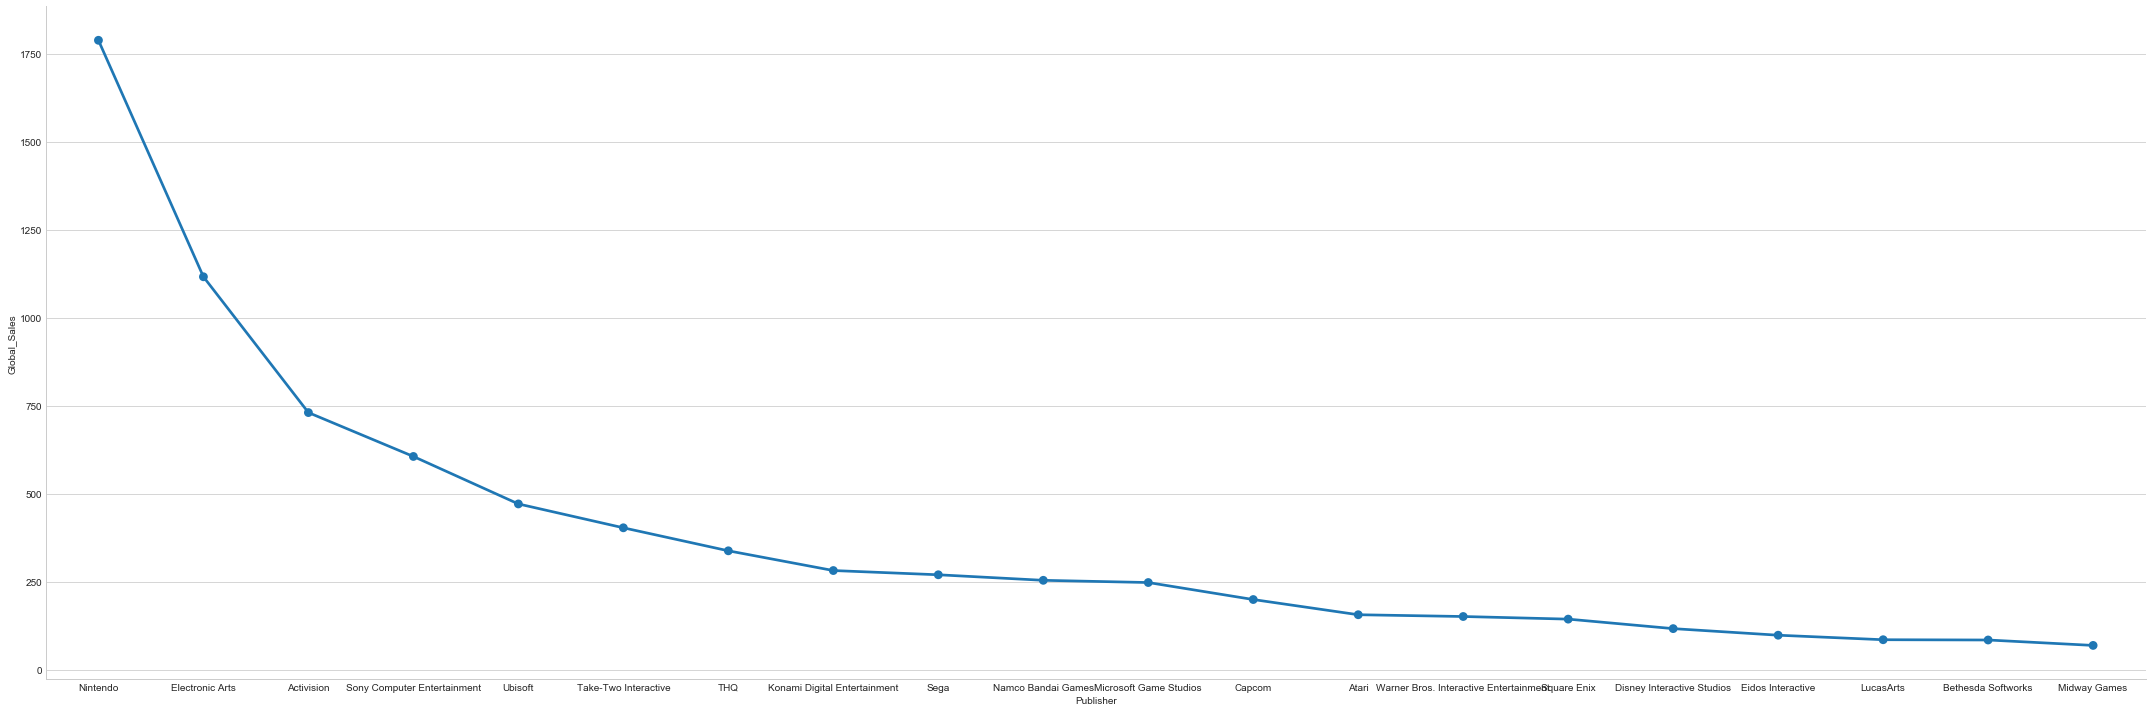

In [42]:
#df4.iplot(kind='bar',x='Publisher',y='Global_Sales')

sns.factorplot(x='Publisher', y='Global_Sales', data=df4, size= 10, aspect= 3, legend=0)


In [51]:

df4.iplot(kind='bar',x='Publisher',y='Global_Sales')
